In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

## Exercise 3

In [3]:
mean = np.array([2,2])
cov = np.array([[3,2],[2,4]])

#### (a) Determining E[y/x] and plotting it

In [4]:
x = np.arange(-10,10,0.1)
alpha = cov[0,1]/(np.sqrt(cov[0,0])*np.sqrt(cov[1,1]))
def E(x):
    return mean[0] + (alpha*np.sqrt(cov[0,0])/np.sqrt(cov[1,1]))*(x-mean[1])

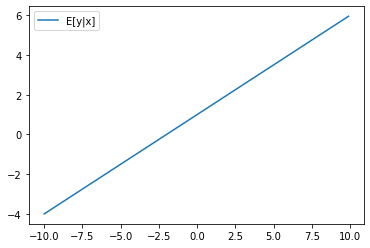

In [5]:
plt.plot(x,E(x),label='E[y|x]')
plt.legend()

#### (b) Generating 100 data sets of N=50 pairs from p(y,x)

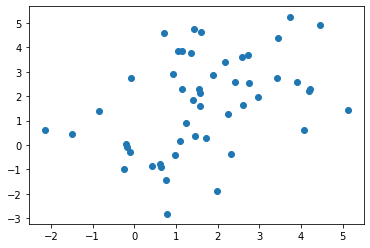

In [6]:
N = 50
D = np.zeros((100,N,2))
for i in range(0,100):
    D[i,:,:] = np.random.multivariate_normal(mean, cov, 50)

plt.scatter(D[0,:,0],D[0,:,1])

#### (c) Adopt a linear estimator f(x;D) and determine its instances.

In [7]:
theta = np.zeros((100,2))
for i in range(0,100):
    ones = np.ones((N,1))
    X = np.column_stack((ones,D[i,:,1]))
    theta[i,:] = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,D[i,:,0]))

In [8]:
def estimate(x,theta):
    return theta[0] + theta[1]*x

#### (d) Plotting the optimal estimator, the estimators for each dataset and the average of the estimators of the datasets

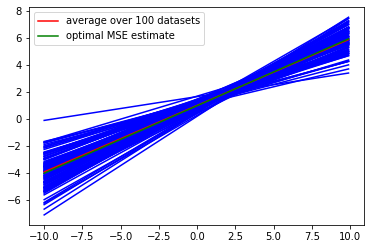

In [9]:
for i in range(0,100):
    f = estimate(x,theta[i])
    plt.plot(x,f,'b')
    
plt.plot(x,estimate(x,np.average(theta,axis=0)),'r',label="average over 100 datasets")
plt.plot(x,E(x),'g',label='optimal MSE estimate')
plt.legend()

#### (e) The same steps for 100 datasets of 5000 points

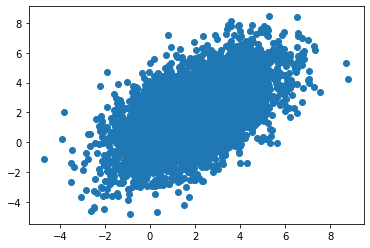

In [10]:
N = 5000
D = np.zeros((100,N,2))
for i in range(0,100):
    D[i,:,:] = np.random.multivariate_normal(mean, cov, N)

plt.scatter(D[0,:,0],D[0,:,1])

In [11]:
theta = np.zeros((100,2))
for i in range(0,100):
    ones = np.ones((N,1))
    X = np.column_stack((ones,D[i,:,1]))
    theta[i,:] = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,D[i,:,0]))

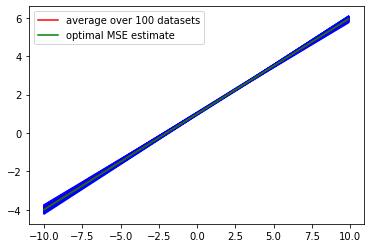

In [12]:
for i in range(0,100):
    f = estimate(x,theta[i])
    plt.plot(x,f,'b')
    
plt.plot(x,estimate(x,np.average(theta,axis=0)),'r',label="average over 100 datasets")
plt.plot(x,E(x),'g',label='optimal MSE estimate')
plt.legend()

 **(f)** We can see that when N is bigger, the variance of the estimator decreases.

## Exercise 4

#### (a) Generating one dataset of 100 pairs from p(y/x)

In [13]:
N = 100
D = np.zeros((N,2))
D = np.random.multivariate_normal(mean, cov, N)

#### (b) Determining the linear estimate f(x;D).

In [14]:
ones = np.ones((N,1))
X = np.column_stack((ones,D[:,1]))
theta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,D[:,0]))

#### (c) Generating a set D' of additional 50 points and computing the estimate for each pair

In [15]:
N = 50
D_2 = np.zeros((N,2))
D_2 = np.random.multivariate_normal(mean, cov, N)

In [16]:
f = np.zeros((50,1))
for i in range(50):
    f[i] = estimate(D_2[i,1],theta)

#### (d) Determine the associate estimates y' = E[y/x]

In [17]:
y = np.zeros((50,1))
for i in range(0,50):
    y[i] = E(D_2[i,1])

**(e)** We can use the MSE criterion to quantify the performance for our estimators

In [19]:
np.mean((f - y)**2)

0.02739861258829964

### Exercise 5

#### Generate a set D of 100 data pairs from the uniform distribution of exercise 2, $p(x,y) = 3/2$, for $x\in(0,1)$, $y\in(x^2,1)$.

In [20]:
N=100
A = np.random.uniform(0,1,size=(1000,2))
I = A[:,1] > A[:,0]**2
D = A[I,:]
D = D[0:N,:]

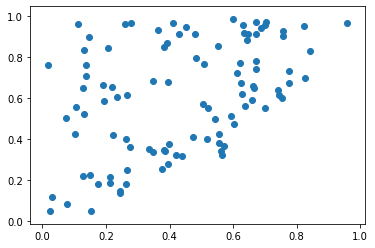

In [21]:
plt.scatter(D[:,0],D[:,1])

#### (a) Compute the MSE estimate

In [22]:
def estimate(x):
    return 0.5*(1+x**2)

In [23]:
y = np.zeros((len(D)))
for i in range(0,len(D)):
    y[i] = estimate(D[i,0])

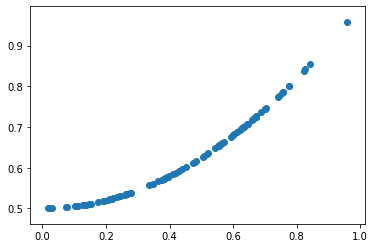

In [24]:
plt.scatter(D[:,0],y)

#### (b) Compute mean and covariance matrix

In [25]:
mean = np.zeros((2))

In [26]:
mean[0] = np.mean(D[:,0])
mean[1] = np.mean(D[:,1])
mean

array([0.43727913, 0.60348891])

In [27]:
cov = (1/N)*((np.dot((mean-D).T,mean-D)))
cov

array([[0.05366583, 0.02743937],
       [0.02743937, 0.07232228]])

#### (c) Suppose you don't know the distribution and you have normal with the above parameters. Compute the MSE estimate for our x's.

In [28]:
alpha = cov[0,1]/(np.sqrt(cov[0,0])*np.sqrt(cov[1,1]))
def E(x):
    return mean[0] + (alpha*np.sqrt(cov[0,0])/np.sqrt(cov[1,1]))*(x-mean[1])

In [63]:
est = np.zeros((N))
for i in range(0,N):
    est[i] = E(D[i,0])

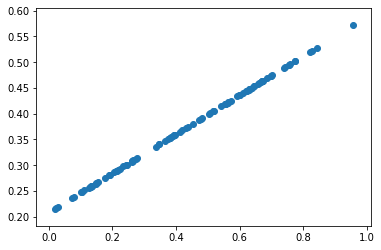

In [64]:
plt.scatter(D[:,0],est)

In [69]:
mse_truePDF = np.mean((y - D[:,1])**2); mse_truePDF

0.058543500766974656

In [70]:
mse_est = np.mean((est - D[:,1])**2); mse_est

0.11179105630297526

**(d)** We can see that the MSE for the estimate of true pdf has less probability error than the estimate of the gaussian.